<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/RegresionLogistica_Clasificaci%C3%B3nScoreEstudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving student_scores.csv to student_scores.csv
User uploaded file "student_scores.csv" with length 214 bytes


In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Importación de Datos.

In [3]:
df = pd.read_csv('student_scores.csv')

### Data Wrangling.

In [15]:
df.shape

(25, 3)

In [5]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df['score_label'] =  np.where(df['Scores'] >= 60, 1, 0)

In [10]:
df['score_label'].value_counts()

0    14
1    11
Name: score_label, dtype: int64

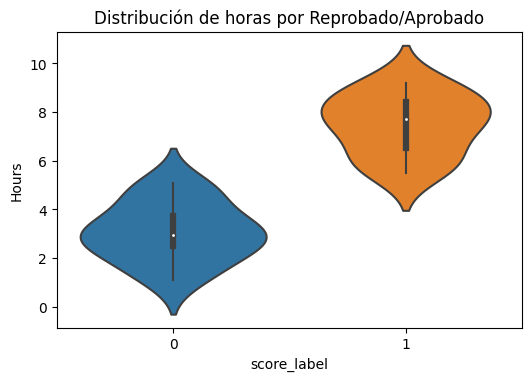

In [183]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'score_label',
        y     = 'Hours',
        data  = df,
        ax    = ax
    )

ax.set_title('Distribución de horas por Reprobado/Aprobado')
plt.show();

In [190]:
X = df['Hours']
y = df['score_label']

In [191]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

### Implemente un modelo logístico de clasificación.

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 33)

In [208]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(penalty='none')
modelo.fit(X = X_train , y = y_train)

LogisticRegression(penalty='none')

In [59]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))

Intercept: [-207.23014001]
Coeficiente: [('Hours', 39.11130231672284)]
Accuracy de entrenamiento: 1.0


In [60]:
predicciones = modelo.predict(X_test)

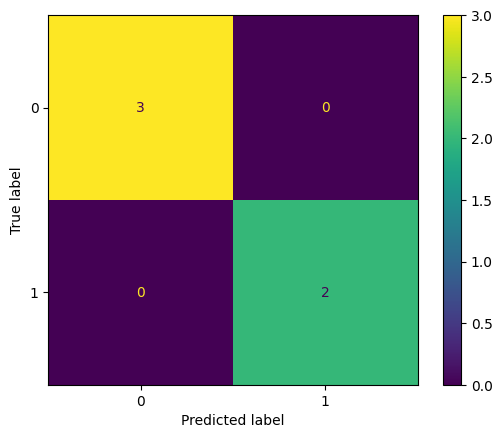

In [61]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

### Grafique el resultado. ¿Se aprecia una función sigmoidea?

_Si se aprecia la función Sigmoidea._

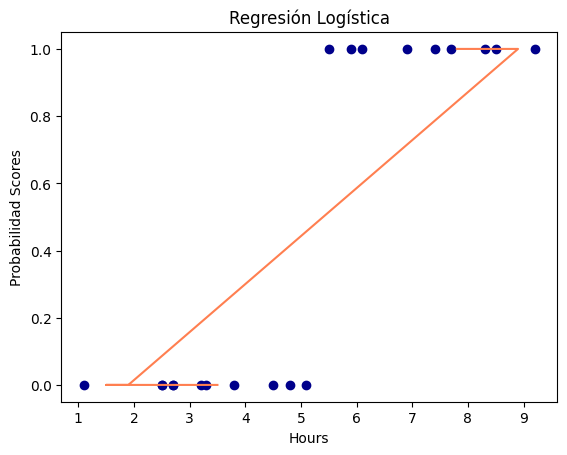

In [181]:
plt.scatter(X_train, y_train,color='darkblue')
plt.plot(X_test, predicciones, color='coral')

plt.title('Regresión Logística')
plt.xlabel('Hours')
plt.ylabel('Probabilidad Scores')
plt.show()

### Realice algunas predicciones.

In [207]:
import warnings
warnings.filterwarnings("ignore")

# Nuevos valores
X_new = pd.DataFrame([8.7,4.3,5.9,5.1,4,9,3.1,9.3,1.5])

# make a prediction
new_predict = modelo.predict(X_new)
print(new_predict)

[1 0 1 0 0 1 0 1 0]
